In [122]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import pos_tag
import re
import heapq
import numpy as np
import mpld3
import ast
import time
import pickle

import spacy
import glob
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, jaccard_score, silhouette_score

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [3]:
os.chdir(r"C:\Users\jadel\Documents\OpenClassrooms\Projet 5")

In [4]:
df = pd.read_csv('dataset_clean.csv', index_col = 0)

In [5]:
df['body'] = df['body'].apply(lambda x: list(ast.literal_eval(x)))
df['tags'] = df['tags'].apply(lambda x: list(ast.literal_eval(x)))
df['title'] = df['title'].apply(lambda x: list(ast.literal_eval(x)))

In [6]:
df.shape

(12730, 4)

In [7]:
df

,title,body,tags,corpus
creationdate,,,,
2016-04-12 21:07:35,"[free, memory, exit]","[free, memory, exit, free, mallocated, memory,...",[c],Should I free memory before exit? <p>Should I ...
2019-03-01 08:08:03,"[target, dom, react, useref, map]","[target, dom, react, useref, map, look, soluti...","[javascript, reactjs]",How target DOM with react useRef in map <p>I l...
2016-03-22 20:52:02,"[var, parameter, deprecate, remove, swift]","[var, parameter, deprecate, remove, swift, alr...","[xcode, swift]",'var' parameters are deprecated and will be re...
2016-03-23 08:17:53,"[opencv, depth, map, uncalibrated, stereo, sys...","[opencv, depth, map, uncalibrated, stereo, sys...",[python],OpenCV – Depth map from Uncalibrated Stereo Sy...
2016-03-23 08:41:08,"[difference, valid, validate, spring]","[difference, valid, validate, spring, spring, ...","[java, spring]",Difference between @Valid and @Validated in Sp...
...,...,...,...,...
2018-12-30 16:32:55,"[search, value, anywhere, panda, dataframe]","[search, value, anywhere, panda, dataframe, se...","[python, pandas, dataframe]",Search for a value anywhere in a pandas DataFr...
2018-12-31 06:03:36,"[none, __eq__, seem, evaluate, true, quite]","[none, __eq__, seem, evaluate, true, quite, ex...",[python],"Why does `if None.__eq__(""a"")` seem to evaluat..."
2019-01-01 13:44:26,"[warn, budget, maximum, exceed, initial]","[warn, budget, maximum, exceed, initial, build...",[angular],"WARNING in budgets, maximum exceeded for initi..."


# Feature Engineering

# Unsupervised

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['body'], df['tags'])

In [9]:
id2word = corpora.Dictionary(X_train)

corpus = [id2word.doc2bow(post) for post in X_train]
    
print(corpus[0][:20])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 2), (14, 5), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1)]


In [10]:
topic_numbers = [50,75,100,125,150,175,200]
scores = []

for x in topic_numbers:
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=x)
    cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
    score = cm.get_coherence()  # get coherence value
    scores.append(score)

Text(0.5, 1.0, 'Coherence score selon nombre de topics')

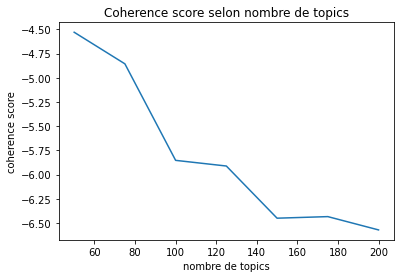

In [54]:
plt.plot(topic_numbers,scores)
plt.xlabel('nombre de topics')
plt.ylabel('coherence score')
plt.title('Coherence score selon nombre de topics')

#plus on augmente le nombre de topics, moins bon est le score.
# on retiendra 50 topics

In [12]:
nb_topics = 50

model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=nb_topics)

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.130482  0.078884       1        1  5.189251
43    -0.024368  0.074614       2        1  4.587787
22     0.067484  0.138341       3        1  3.770911
15     0.237020  0.195123       4        1  3.371213
28     0.229164  0.017894       5        1  3.267604
48    -0.107111  0.243888       6        1  2.865706
1      0.054147  0.058608       7        1  2.786356
46    -0.123827  0.038953       8        1  2.775304
6     -0.264381  0.237040       9        1  2.740392
2      0.057193  0.347842      10        1  2.725523
16     0.366730  0.094069      11        1  2.660784
49    -0.147402  0.283879      12        1  2.654866
34    -0.382306  0.092839      13        1  2.587302
47    -0.097529  0.179176      14        1  2.557250
25     0.069546 -0.226470      15        1  2.520075
10    -0.008899  0.323649      16        1  2.302954
38    -0.110220  0.105951      17        1  2.295270
41    -0.273686  0.164516      18        1  2.294706
12     0.327754  0.095875      19        1  2.249757
26     0.124562  0.205777      20        1  2.220219
18     0.051984  0.211621      21        1  2.123010
9     -0.050562 -0.005403      22        1  2.122880
35     0.249744  0.154772      23        1  2.078176
42    -0.165552 -0.119579      24        1  2.069041
5     -0.126058 -0.302606      25        1  1.946641
33    -0.171165  0.142076      26        1  1.886118
23     0.200300 -0.073867      27        1  1.789968
27    -0.101076 -0.049802      28        1  1.719421
44     0.118162 -0.010835      29        1  1.603779
19     0.024545 -0.054719      30        1  1.585578
20    -0.197752 -0.214414      31        1  1.546854
39     0.185242  0.047367      32        1  1.525643
13    -0.268854 -0.196394      33        1  1.509969
7      0.245663 -0.215982      34        1  1.461558
30     0.342403 -0.138535      35        1  1.455940
14     0.230397 -0.119168      36        1  1.399304
36     0.066466 -0.143120      37        1  1.390308
29     0.083007 -0.338018      38        1  1.344588
0     -0.055101 -0.299440      39        1  1.319063
3     -0.278619 -0.026762      40        1  1.259494
37     0.025203 -0.142944      41        1  1.256438
21    -0.281857 -0.138379      42        1  0.982939
45     0.143339 -0.238364      43        1  0.961174
8     -0.068319 -0.173223      44        1  0.938633
17     0.100913  0.265766      45        1  0.823227
24    -0.216550  0.037587      46        1  0.804661
40    -0.241023  0.006272      47        1  0.783406
32    -0.121789 -0.181209      48        1  0.712566
31     0.007519 -0.301195      49        1  0.606178
11     0.145036 -0.131952      50        1  0.570216, topic_info=           Term         Freq        Total Category  logprob  loglift
546     android  7746.000000  7746.000000  Default  30.0000  30.0000
321        java  4915.000000  4915.000000  Default  29.0000  29.0000
72          org  2765.000000  2765.000000  Default  28.0000  28.0000
1139    angular  2669.000000  2669.000000  Default  27.0000  27.0000
20       python  3750.000000  3750.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1587  operation    29.011327   367.385112  Topic50  -5.2890   2.6282
88          set    30.142115  2791.870316  Topic50  -5.2508   0.6384
93        start    28.887907  1807.019037  Topic50  -5.2933   1.0309
33      command    25.880436  1592.839609  Topic50  -5.4032   1.0471
343           v    25.764071  2890.908803  Topic50  -5.4077   0.4466

[3480 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
311        1  0.016149           _
311        2  0.004037           _
311        3  0.004037           _
311        4  0.046430           _
311        5  0.006056           _
...      ...       ...         ...
8640      47  0.006419  zygoteinit
11176      4  0.0577

In [14]:
#matrice de probabilités topic/mots

M_topic_word = model.get_topics()

M_topic_word.shape

(50, 65621)

In [15]:
#fonction qui calcule la matrice de probabilité post/topic

def get_doc_topic(corpus, model):
    doc_topic = list()
    for doc in corpus:
        topic_post = []
        for i in model.__getitem__(doc, eps=0):
            topic_post.append(i[1])
        doc_topic.append(topic_post)
    return doc_topic

In [16]:
#application de la fonction et conversion liste en matrice

list_post_topic = get_doc_topic(corpus, model)
M_post_topic = np.array(list_post_topic)
M_post_topic = np.where(M_post_topic < 0.01, 0, M_post_topic) #seuil à zéro de 0.01

M_post_topic.shape

(9547, 50)

In [17]:
#multiplication des deux matrices pour obtenir la matrice de probabilité des mots pour un post

M_post_words =  np.matmul(M_post_topic, M_topic_word)
M_post_words = np.where(M_post_words < 0.01, 0, M_post_words) #seuil à zéro

M_post_words.shape

(9547, 65621)

In [18]:
id2word.doc2bow(X_test[0])

[(5, 5),
 (6, 1),
 (8, 4),
 (18, 1),
 (25, 1),
 (33, 2),
 (60, 1),
 (89, 2),
 (90, 1),
 (130, 1),
 (131, 1),
 (158, 2),
 (172, 1),
 (174, 7),
 (186, 4),
 (213, 1),
 (269, 8),
 (276, 7),
 (310, 1),
 (388, 1),
 (410, 1),
 (413, 4),
 (452, 1),
 (477, 2),
 (568, 1),
 (690, 1),
 (699, 1),
 (735, 1),
 (775, 1),
 (910, 1),
 (988, 2),
 (1203, 2),
 (1214, 1),
 (1220, 4),
 (1295, 1),
 (1434, 3),
 (1438, 3),
 (1587, 2),
 (1633, 2),
 (1725, 2),
 (1799, 1),
 (1978, 1),
 (2047, 1),
 (2069, 2),
 (2107, 1),
 (2187, 1),
 (2335, 1),
 (2387, 2),
 (2731, 2),
 (3618, 1),
 (3672, 1),
 (3753, 1),
 (4105, 1),
 (5356, 1),
 (6719, 1),
 (6794, 2),
 (7493, 1),
 (8938, 1),
 (9401, 2),
 (10999, 1),
 (19485, 1),
 (26508, 1),
 (27826, 2),
 (39547, 1)]

In [19]:
corpus_test = [id2word.doc2bow(post) for post in X_test] #application de notre id2word entraîné sur les posts de test
test_topics = model[corpus_test] #

In [21]:
list_post_topic = (get_doc_topic(corpus_test, model))

In [22]:
#la liste est de meme dimension que le nombre de posts dans X_test et le nombre de topics du modèle

print(len(list_post_topic))
len(list_post_topic[0])

3183


50

In [23]:
#conversion de la liste en matrice

M_post_topic_test = np.array(list_post_topic)
M_post_topic_test = np.where(M_post_topic_test < 0.01, 0, M_post_topic_test) #seuil à zéro

M_post_topic_test.shape

(3183, 50)

In [24]:
#multiplication des deux matrices pour obtenir la matrice de probabilité des mots pour un post

M_post_words_test =  np.matmul(M_post_topic_test,M_topic_word)

M_post_words_test = np.where(M_post_words_test < 0.01, 0, M_post_words_test) #seuil à zéro
M_post_words_test.shape

(3183, 65621)

In [25]:
for word_index in list(np.where(M_post_words_test[50]>0)[0]):
    print(id2word.get(word_index))

app
android


# Supervised

In [26]:
#mise en place d'un dictionnaire avec comme clé tous les mots uniques et comme valeur leur fréquence

wordfreq = {}
for tokens in df['title']:
    for token in tokens :
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [27]:
most_freq = heapq.nlargest(2000, wordfreq, key=wordfreq.get)

In [28]:
pickle.dump(most_freq, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\most_freq.pkl", "wb"))

In [29]:
#calcul de tf de chaque token sur chaque post

tf_values = {}

for token in most_freq:
    #token vector of all its tf scores by post
    token_posts_tfs = []
    #iteration over all posts to calculate a token frequency
    for post in df['body']:
        
        doc_freq = 0
        #iteration over all words in the post to see how often the token appears
        
        for word in post:
            if token == word:
                  doc_freq += 1
        token_post_tf = doc_freq/len(post)
        token_posts_tfs.append(token_post_tf)
        
    tf_values[token] = token_posts_tfs

In [30]:
#calcul de l'idf de chaque mot sur l'ensemble des sujets

idf_values = {}

for token in most_freq:
    doc_containing_word = 0
    for post in df['body']:
        if token in post:
            doc_containing_word += 1
    idf_values[token] = np.log(df['body'].shape[0]/(1 + doc_containing_word))

In [31]:
pickle.dump(idf_values, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\idf_values.pkl", "wb"))

In [32]:
#multiplication de chaque valeur tf par sa valeur idf correspondante

tfidf_values = []
for token in tf_values.keys():
    token_tfidf = []
    for token_tf in tf_values[token]:
        tf_idf_score = token_tf * idf_values[token]
        token_tfidf.append(tf_idf_score)
    tfidf_values.append(token_tfidf)

In [33]:
#transformation de la liste tf_idf en numpy array

tf_idf_model = np.asarray(tfidf_values)

#transposition de la matrice pour avoir une matrice de la forme (documents * mots uniques)

tf_idf_model = np.transpose(tf_idf_model)

In [34]:
tf_idf_model.shape

(12730, 2000)

In [35]:
df = df.reset_index(drop = 'True')

In [36]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['tags'])

In [37]:
pickle.dump(mlb, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\mlb.pkl", "wb"))

In [39]:
#extraction de l'index des 5 tags les plus fréquents

top_5 = np.sort(y.sum(axis=0))[-5:]

idx_top_5 = []
for i in top_5:
    idx_top_5.append(np.argwhere(y.sum(axis=0)==i)[0][0])

In [40]:
#liste booléene des posts contenant au moins un des 5 tags fréquents 

mask = y[:,idx_top_5].sum(axis = 1)==1

In [41]:
#nous allons réduire la dimensionnalité de notre dataset car nous avons un nombre de feature trop important

#test du PCA avec différents paramètres
for i in [.60, .70, .80, .85, .90, .95]:
    pca = PCA(i)
    pca.fit(tf_idf_model)
    X = pca.transform(tf_idf_model)    

    tsne_feat = TSNE(n_components = 2).fit_transform(X[mask])
    print("Silhouette score avec PCA à", i*100, "% : ", silhouette_score(tsne_feat, y[mask].argmax(axis=1)))

Silhouette score avec PCA à 60.0 % :  -0.25617036
Silhouette score avec PCA à 70.0 % :  -0.29275692
Silhouette score avec PCA à 80.0 % :  -0.29062262
Silhouette score avec PCA à 85.0 % :  -0.31739512
Silhouette score avec PCA à 90.0 % :  -0.30408153
Silhouette score avec PCA à 95.0 % :  -0.29113972


In [42]:
X.shape

(12730, 1426)

In [43]:

pca = PCA(.7)
pca.fit(tf_idf_model)
X = pca.transform(tf_idf_model)    

tsne_feat = TSNE(n_components = 2).fit_transform(X[mask])

Text(0.5, 1.0, 'Silhouette score = -0.29357340931892395')

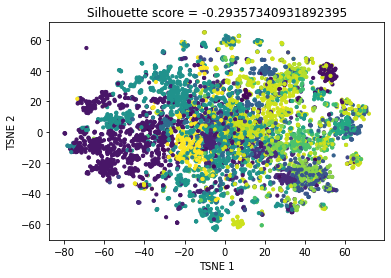

In [44]:
#visualisation TSNE

plt.scatter(tsne_feat[:, 0], tsne_feat[:, 1], c=y[mask].argmax(axis=1), s=10)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title(f"Silhouette score = {silhouette_score(tsne_feat, y[mask].argmax(axis=1))}")

In [45]:
X.shape

#nous sommes passés de 2000 à 591 features en conservant 70% de la variance

(12730, 591)

In [46]:
pickle.dump(pca, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\pca.pkl", "wb"))

In [47]:
## séparation du jeu de données en jeu d'entraînement et jeu de test

shuffle = list(range(X.shape[0]))
np.random.seed(1233)
np.random.shuffle(shuffle)

X_train, y_train = X[shuffle[:-2000]], y[shuffle[:-2000]]
X_test, y_test = X[shuffle[-2000:]], y[shuffle[-2000:]]

In [48]:
X_train.shape

(10730, 591)

In [49]:
y_train.shape

(10730, 67)

In [50]:
y_test.sum(axis=0)
 
#tous les tags sont représentés dans les données test

array([ 81,  25,  12, 204,  34, 140,  41,  19,  14,  28,  83,  65,  45,
        42,  38,  28,  24,  50,  35,  54,  58,  51,  17,  20,  17,  49,
       131, 147, 267,  18,  36,  18,  39,  26,  23,  27,  39,  41,  21,
        26,  19, 105,  43,  29,  68,  16,  31,  20,  13, 339,  32,  25,
        18, 123,  23,  23,  66,  88,  37,  87,  21,  19,  20,  30,  30,
        22,  49])

In [51]:
mlb.classes_

array(['.net', 'amazon-web-services', 'anaconda', 'android',
       'android-studio', 'angular', 'apache-spark', 'arrays', 'bash', 'c',
       'c#', 'c++', 'css', 'dart', 'dataframe', 'deep-learning', 'django',
       'docker', 'ecmascript-6', 'firebase', 'flutter', 'git', 'github',
       'google-chrome', 'gradle', 'html', 'ios', 'java', 'javascript',
       'jquery', 'json', 'jupyter-notebook', 'keras', 'kotlin', 'laravel',
       'linux', 'machine-learning', 'macos', 'matplotlib', 'mysql',
       'neural-network', 'node.js', 'npm', 'numpy', 'pandas',
       'performance', 'php', 'pip', 'pyspark', 'python', 'r',
       'react-native', 'react-router', 'reactjs', 'redux', 'scikit-learn',
       'spring', 'swift', 'tensorflow', 'typescript', 'ubuntu',
       'unit-testing', 'visual-studio-code', 'vue.js', 'webpack',
       'windows', 'xcode'], dtype=object)

In [56]:
#création d'un objet score pour le gridsearch

def error_function(y_test, y_pred):
    return jaccard_score(y_test, y_pred, average='weighted')

score = make_scorer(error_function, greater_is_better=True)

In [57]:
param_grid_ovr_svc = {'estimator__kernel' :['rbf'],
               'estimator__gamma' : [1,0.1,0.01],
                'estimator__C' : [.1,1,100]}

ovr_svc = OneVsRestClassifier(SVC())
gs_ovr_svc = GridSearchCV(ovr_svc, param_grid_ovr_svc, scoring=score,n_jobs=-1)
t0=time.time()
gs_ovr_svc.fit(X_train, y_train)
print("Execution time :",time.time()-t0,"secondes")
gs_ovr_svc.best_params_

C:\Users\jadel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Execution time : 2947.7308599948883 secondes


{'estimator__kernel': 'rbf', 'estimator__gamma': 0.1, 'estimator__C': 100}

In [135]:
param_grid_ovr_kn = {'estimator__n_neighbors' :[3,5,10],
               'estimator__weights' : ['uniform', 'distance'],
                'estimator__metric' : ['euclidean']}

ovr_kn = OneVsRestClassifier(KNeighborsClassifier())
gs_ovr_kn = GridSearchCV(ovr_kn, param_grid_ovr_kn, scoring=score,n_jobs=-1)
t0=time.time()
gs_ovr_kn.fit(X_train, y_train)
print("Execution time :",time.time()-t0,"secondes")
gs_ovr_kn.best_params_

C:\Users\jadel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Execution time : 520.8456792831421 secondes


{'estimator__weights': 'uniform',
 'estimator__n_neighbors': 3,
 'estimator__metric': 'euclidean'}

In [136]:
ovr_svc = gs_ovr_svc.best_estimator_
y_pred_svc = ovr_svc.predict(X_test)

ovr_kn = gs_ovr_kn.best_estimator_
y_pred_kn = ovr_kn.predict(X_test)

print("Weighted jaccard score SVC :",jaccard_score(y_test, y_pred_svc, average = 'weighted').round(3))
print("Weighted jaccard score KNeighbors :",jaccard_score(y_test, y_pred_kn, average = 'weighted').round(3))

#le jaccard score est le plus élevé avec l'agorithme SVC

Weighted jaccard score SVC : 0.576
Weighted jaccard score KNeighbors : 0.414


In [149]:
#test du classifieur en modifiant le seuil de probabilité

mlc = OneVsRestClassifier(SVC(kernel= 'rbf', gamma= 0.1, C= 100, probability = True))
t0= time.time()
mlc.fit(X_train, y_train)
y_pred_svc_proba = mlc.predict_proba(X_test)
print("Execution time :",time.time()-t0,"secondes")

Execution time : 811.1847143173218 secondes


In [143]:
thresholds = np.arange(0,0.4,.01)
jaccard_scores = []

for threshold in thresholds:
    y_pred = np.where(y_pred_svc_proba < threshold, 0, y_pred_svc_proba) #seuil à zéro
    y_pred = np.where(y_pred > 0, 1, y_pred) # ce qui reste à 1
    jaccard_scores.append(jaccard_score(y_test, y_pred, average = 'weighted').round(3))

Jaccard Score maximum de 0.595 pour un threshold à 0.22


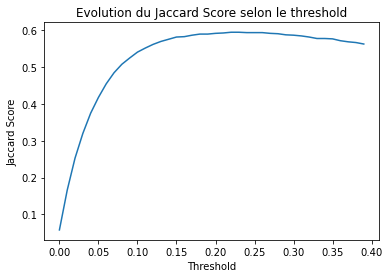

In [144]:
plt.plot(thresholds, jaccard_scores)
plt.xlabel('Threshold')
plt.ylabel('Jaccard Score')
plt.title('Evolution du Jaccard Score selon le threshold')

print(f"Jaccard Score maximum de {max(jaccard_scores)} pour un threshold à {thresholds[jaccard_scores.index(max(jaccard_scores))]}")

In [150]:
# entrainement du clf sur tout le dataset

mlc = mlc.fit(X, y)

In [151]:
pickle.dump(mlc, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\mlc.pkl", "wb"))
pickle.dump(idf_values, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\idf_values.pkl", "wb"))
pickle.dump(mlb, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\mlb.pkl", "wb"))
pickle.dump(most_freq, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\most_freq.pkl", "wb"))
pickle.dump(pca, open("C:\\Users\\jadel\\Documents\\OpenClassrooms\\Projet 5\\pca.pkl", "wb"))